In [2]:
# importing libraries 
import numpy as np
import pandas as pd
import math

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import GenericUnivariateSelect, RFECV, chi2
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from scipy.stats import randint
from sklearn.preprocessing import MinMaxScaler

from sklearn import svm
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

In [22]:
CD_rev_train = pd.read_json("./full_preprocessed_sentiment.json")
CD_prod_train = pd.read_json("./devided_dataset_v2/CDs_and_Vinyl/train/product_training.json")

In [23]:
CD_rev_train.head(2)

,asin,reviewerID,unixReviewTime,vote,verified,reviewTime,style,reviewerName,reviewText,summary,image,rev_compSentiment,summ_compSentiment,rev_Sentiment,summ_Sentiment,rev_posSentiment,summ_posSentiment,rev_negSentiment,summ_negSentiment
0,6673F1740E03573BCD64238FE711FC69,9C856D4A18E1355783B3B28B7ECC1848,1451520000,9,True,"12 31, 2015",{'Format:': ' MP3 Music'},8D88BB79AAC50277AEE82FCFD77F6744,finding beatles better ever huge beatles fan o...,sit listening jaw floor could good need anothe...,False,0.9950,0.4404,1,1,0.409,0.244,0.000,0.0
1,690819436E20BB31657AF6B58B984DD4,6E9ABBD26A27C2B2851D1EC34A01CBDC,1113523200,9,False,"04 15, 2005",{'Format:': ' Audio CD'},8DC0611245A871AC51BBEEBB85F33A58,guy sing classic tune poignant painful heartfe...,appreciated,False,0.7057,0.5106,1,1,0.201,1.000,0.066,0.0


In [3]:
prod_train = pd.read_json("preprocessed_data.json")
prod_train

,reviewerID,vote,verified,unixReviewTime,rev_Sentiment,summ_Sentiment,rev_compSentiment,summ_compSentiment,rev_posSentiment,summ_posSentiment,...,asin,awesomeness,rev_posNegRatio,summ_posNegRatio,summToRev,normalized_time,max_upvote,av_word_count,total_reviews,norm_time_diff
0,4,1.500000,0.500000,933552000,1,1,0.892900,0.362375,0.548250,0.380000,...,0000B049F5B33CD310EB1AB236E20191,1,1.493009,1.380000,0.719729,0.710932,6,43.250000,4,7.732503
1,18,2.500000,0.166667,983836800,1,1,0.682206,0.190683,0.272444,0.275333,...,00018184A9EC4D270219A296B2580303,0,1.160342,1.212806,0.707811,1.491616,22,120.611111,18,8.080412
2,4,1.250000,0.750000,1040342400,1,0,0.716600,-0.081925,0.420000,0.131000,...,000281A9CAC43FF1F335726A390636DA,0,1.391475,0.782970,0.534822,2.368880,5,70.000000,4,5.904968
3,29,2.862069,0.586207,1001030400,1,0,0.658507,0.258576,0.451897,0.303552,...,00030884DF109F325638A6BFD5B13CFF,1,1.411451,1.281892,0.758861,1.758551,37,41.551724,29,7.769054
4,4,1.750000,1.000000,1283472000,1,0,0.768650,0.025250,0.477250,0.100000,...,000325BA25966B5FC701D5D2B5DBA4E0,0,1.410599,1.011262,0.579679,6.143528,7,41.500000,4,2.712874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73077,64,0.890625,0.375000,914025600,1,1,0.657161,0.205630,0.393672,0.377188,...,FFFDD3C72D23AF858D6E0ED92612370D,1,1.257596,1.249929,0.727527,0.407780,17,88.687500,64,9.298768
73078,4,2.000000,0.500000,1127088000,1,1,0.955525,0.242350,0.473500,0.379250,...,FFFDDE284A73B29B320381487EC7DE9E,1,1.447446,1.379250,0.635303,3.715627,6,77.500000,4,5.944226
73079,2,0.000000,1.000000,1345852800,1,1,0.972300,0.038600,0.365500,0.199000,...,FFFEB3EE2372807964F024707D50FB21,0,1.312981,1.015671,0.526593,7.112005,0,59.500000,2,0.100176
73080,7,1.571429,0.571429,1416182400,1,1,0.527357,0.395614,0.240429,0.323000,...,FFFF4545AB232D81D0F9B208388BB7AA,1,1.081724,1.266029,0.913745,8.203890,8,96.285714,7,0.468390


## Adding Features for Task 2

In [9]:
# adding features for task 2
# max upvote
max_upvote = CD_rev_train.groupby('asin')['vote'].max()
max_upvote = max_upvote.values.reshape(-1, 1)

# normalized earliest rev from 0 to 10
earliest_rev = CD_rev_train.groupby('asin')['unixReviewTime'].min()
scaler = MinMaxScaler(feature_range=(0, 10))
normalized_rev = earliest_rev.values.reshape(-1, 1)
normalized_rev = scaler.fit_transform(normalized_rev)

# length of review
CD_rev_train['rev_word_count'] = CD_rev_train['reviewText'].str.split().apply(len)
av_word_count = CD_rev_train.groupby('asin')['rev_word_count'].mean()
av_word_count = av_word_count.values.reshape(-1,1)


In [28]:
# TOTAL number of reviews (we have unique reviews)
total_reviews = CD_rev_train.groupby('asin')['reviewerID'].count()
total_reviews = total_reviews.values.reshape(-1,1)

# difference in review time (normalized from 0 to 10)
time_diff = CD_rev_train.groupby('asin')['unixReviewTime'].apply(lambda x: x.max() - x.min())
norm_time_diff = time_diff.values.reshape(-1,1)
norm_time_diff = scaler.fit_transform(norm_time_diff)

# fixing image feature
prod_image = CD_rev_train.groupby('asin')['image'].mean()
prod_image = prod_image.values.reshape(-1,1)


In [29]:
prod_train['normalized_time'] = normalized_rev
prod_train['max_upvote'] = max_upvote
prod_train['av_word_count'] = av_word_count
prod_train['total_reviews'] = total_reviews
prod_train['norm_time_diff'] = norm_time_diff
prod_train['image'] = prod_image

In [5]:
# # positive to negative sentiment ratio
# prod_train['rev_posNegRatio'] = (prod_train['rev_posSentiment'] + 1) \
#     / (prod_train['rev_negSentiment'] + 1)
# prod_train['summ_posNegRatio'] = (prod_train['summ_posSentiment'] + 1) \
#     / (prod_train['summ_negSentiment'] + 1)

# # summary to review sentiment ratio
# prod_train['summToRev'] = (prod_train['summ_compSentiment'] + 1) \
#     / (prod_train['rev_compSentiment'] + 1)

In [18]:
#prod_train.to_json(r'/Users/IanShi/Desktop/Classwork/CS 349/cs349-project/preprocessed_data.json')

## Model Testing

In [5]:
features = prod_train.groupby('awesomeness').mean(numeric_only = True)
features = list(features.columns)#features = ['verified','rev_posSentiment', 'rev_negSentiment', 'summ_negSentiment', 'rev_posNegRatio', 'summ_posNegRatio', 'summToRev']
X = prod_train[features]
Y = prod_train['awesomeness']

In [7]:
# splitting data into train and test (70/30)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [28]:
# recursive feature elimination (for classifiers that don't work with the sklearn one)
# by f1 score
def feature_elim_f1(X_train, X_test, Y_train, Y_test, classifier, cfeatures):
    classifier.fit(X_train[cfeatures], Y_train)
    cv_score = cross_val_score(classifier, X[cfeatures], Y, cv = 10, scoring='f1')
    start_val = np.mean(cv_score)
    new_val = 0
    new_features = cfeatures
    for feature in cfeatures:
        f_set = [f for f in cfeatures if f != feature]
        classifier.fit(X_train[f_set], Y_train)
        cv_score = cross_val_score(classifier, X[f_set], Y, cv = 10, scoring='f1')
        temp_val = np.mean(cv_score)
        if temp_val > new_val:
            new_val = temp_val
            new_features = f_set
    if new_val > start_val:
        return feature_elim_f1(X_train, X_test, Y_train, Y_test, classifier, new_features)
    return cfeatures

# recursive feature elimination (for classifiers that don't work with the sklearn one)
# by accuracy
def feature_elim_acc(X_train, X_test, Y_train, Y_test, classifier, cfeatures):
    classifier.fit(X_train[cfeatures], Y_train)
    cpred = classifier.predict(X_test[cfeatures])
    start_val = metrics.accuracy_score(Y_test, cpred)
    new_val = 0
    new_features = cfeatures
    for feature in cfeatures:
        f_set = [f for f in cfeatures if f != feature]
        classifier.fit(X_train[f_set], Y_train)
        cpred = classifier.predict(X_test[f_set])
        temp_val = metrics.accuracy_score(Y_test, cpred)
        if temp_val > new_val:
            new_val = temp_val
            new_features = f_set
    if new_val > start_val:
        return feature_elim_acc(X_train, X_test, Y_train, Y_test, classifier, new_features)
    return cfeatures

In [36]:
# gnb
gnb = GaussianNB()

'''
# results of feature optimization: ['vote', 'verified', 'rev_Sentiment', 'rev_posSentiment', 'rev_negSentiment', 'summ_negSentiment', 'image', 'rev_posNegRatio', 'normalized_time', 'max_upvote', 'norm_time_diff']
gnb_features = features
# cull features by accuracy bc doing it by f1 leads to combos putting all vecs in 1
gnb_features = feature_elim_acc(X_train, X_test, Y_train, Y_test, gnb, gnb_features)
'''

gnb_features = ['vote', 'verified', 'rev_Sentiment', 'rev_posSentiment', 'rev_negSentiment', 'summ_negSentiment', 'image', 'rev_posNegRatio', 'normalized_time', 'max_upvote', 'norm_time_diff']
gnb.fit(X_train[gnb_features], Y_train)
gnb_pred = gnb.predict(X_test[gnb_features])

# model accuracy
print("Gaussian NB Accuracy:",metrics.accuracy_score(Y_test, gnb_pred))

# 10 fold cross validation
gnb_cv = cross_val_score(gnb, X[gnb_features], Y, cv = 10, scoring='f1')
print("Mean CV F1 Score:", np.mean(gnb_cv))
print("Standard Deviation F1 Score:", np.std(gnb_cv))

Gaussian NB Accuracy: 0.5894640820980616
Mean CV F1 Score: 0.6383518491109863
Standard Deviation F1 Score: 0.006228881229503236


              precision    recall  f1-score   support

           0       0.58      0.43      0.49     10234
           1       0.59      0.73      0.66     11691

    accuracy                           0.59     21925
   macro avg       0.59      0.58      0.57     21925
weighted avg       0.59      0.59      0.58     21925



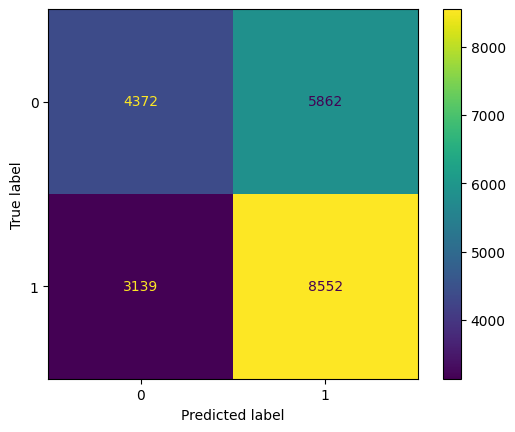

In [37]:
labels = ["0", "1"]
cm = confusion_matrix(Y_test, gnb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
print(classification_report(Y_test, gnb_pred))

In [43]:
## decision tree hyperparameter/feature optimization

'''
# use recursive feature elimination with cv (RFECV) to find best features
# results: ['verified', 'rev_negSentiment', 'summ_negSentiment', 'total_reviews', 'norm_time_diff']
tree = DecisionTreeClassifier(criterion='entropy', max_depth = 3)
rfecv = RFECV(estimator=tree, scoring='f1', n_jobs=-1, cv=10, verbose=0)
rfecv.fit(X_train, Y_train)
tree_pred = rfecv.predict(X_test)
print("Features:", rfecv.get_feature_names_out(features))
tree_cv = pd.DataFrame(rfecv.cv_results_)
'''

'''
# use grid search to find best hyperparameters
# the results are criterion: entropy, max_depth: 5
param_grid = {"criterion": ['gini', 'entropy'], "max_depth": [x for x in range(1,11)]}
tree = DecisionTreeClassifier()
gs = GridSearchCV(estimator=tree, param_grid=param_grid, scoring='f1', n_jobs=-1, cv=10, verbose=2)
gs.fit(X_train, Y_train)
tree_pred = gs.predict(X_test)
tree_cv = pd.DataFrame(gs.cv_results_)
'''

tree_features = ['verified', 'rev_negSentiment', 'summ_negSentiment', 'total_reviews', 'norm_time_diff']

# decision tree
tree = DecisionTreeClassifier(criterion='entropy', max_depth = 5)
tree = tree.fit(X_train[tree_features], Y_train)
tree_pred = tree.predict(X_test[tree_features])

# model accuracy
print("Decision Tree Accuracy:",metrics.accuracy_score(Y_test, tree_pred))

# 10 fold cross validation
tree_cv = cross_val_score(tree, X, Y, cv = 10, scoring='f1')
print("Mean CV F1 Score:", np.mean(tree_cv))
print("Standard Deviation F1 Score:", np.std(tree_cv))

Decision Tree Accuracy: 0.5882782212086659
Mean CV F1 Score: 0.6507184660589886
Standard Deviation F1 Score: 0.014231829886371117


              precision    recall  f1-score   support

           0       0.59      0.40      0.48     10234
           1       0.59      0.75      0.66     11691

    accuracy                           0.59     21925
   macro avg       0.59      0.58      0.57     21925
weighted avg       0.59      0.59      0.57     21925



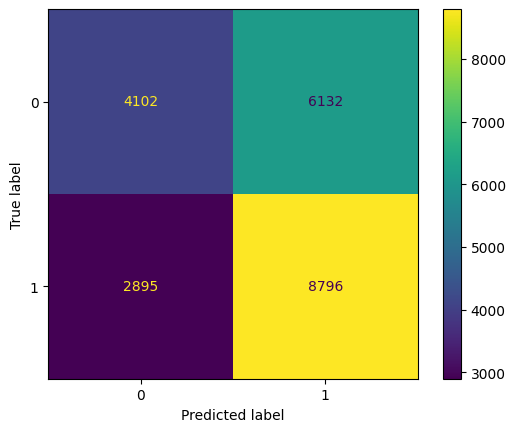

In [44]:
# decision tree confusion matrix
labels = ["0", "1"]
cm = confusion_matrix(Y_test, tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
print(classification_report(Y_test, tree_pred))

In [61]:
rf = RandomForestClassifier(n_estimators = 28, max_depth = 1, n_jobs=-1)
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)

# model accuracy
print("Random Forest Accuracy:",metrics.accuracy_score(Y_test, rf_pred))
forest_cv = cross_val_score(rf, X, Y, cv = 10, scoring='f1')
print("Mean CV F1 Score:", np.mean(forest_cv))
print("Standard Deviation F1 Score:", np.std(forest_cv))

Random Forest Accuracy: 0.5784264538198404
Mean CV F1 Score: 0.677519205223198
Standard Deviation F1 Score: 0.008745422389069848


              precision    recall  f1-score   support

           0       0.59      0.31      0.41     10234
           1       0.57      0.81      0.67     11691

    accuracy                           0.58     21925
   macro avg       0.58      0.56      0.54     21925
weighted avg       0.58      0.58      0.55     21925



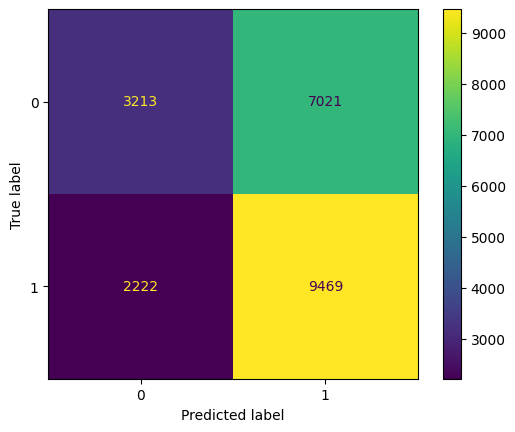

In [69]:
# random forest confusion matrix
labels = ["0", "1"]
cm = confusion_matrix(Y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
print(classification_report(Y_test, rf_pred))

In [59]:
# logistic regression
log_reg = LogisticRegression(fit_intercept=False, solver='sag', multi_class='multinomial', n_jobs=-1)

'''
# results of feature optimization: ['vote', 'verified', 'rev_Sentiment', 'rev_posSentiment', 'rev_negSentiment', 'summ_negSentiment', 'image', 'rev_posNegRatio', 'normalized_time', 'max_upvote', 'norm_time_diff']
lg_features = features
# cull features by accuracy bc doing it by f1 leads to combos putting all vecs in 1
lg_features = feature_elim_acc(X_train, X_test, Y_train, Y_test, log_reg, lg_features)
'''
lg_features = ['reviewerID', 'vote', 'verified', 'rev_Sentiment', 'summ_compSentiment', 'rev_posSentiment', 'summ_posSentiment', 'rev_negSentiment', 'summ_negSentiment', 'image', 'rev_posNegRatio', 'summ_posNegRatio', 'summToRev', 'normalized_time', 'max_upvote', 'av_word_count', 'total_reviews', 'norm_time_diff']

'''
# use grid search to find best hyperparameters
# the results are dual: False (default), fit_intercept: False, penalty: l2 (default), solver: sag
#param_grid = {"penalty": ['l1', 'l2', 'elasticnet'], "dual": [True, False], "fit_intercept": [True, False], "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
# results are multi_class: multinomial
param_grid = {"multi_class": ['auto', 'ovr', 'multinomial']}
gs = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='f1', n_jobs=-1, cv=10, verbose=2)
gs.fit(X[lg_features], Y)
lg_pred = gs.predict(X_test[lg_features])
lg_cv = pd.DataFrame(gs.cv_results_)
'''

# logit
log_reg.fit(X_train[lg_features], Y_train)
lg_pred = log_reg.predict(X_test[lg_features])

# model accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(Y_test, lg_pred))

# 10 fold cross validation
lg_cv = cross_val_score(log_reg, X[lg_features], Y, cv = 10, scoring='f1')
print("Mean CV F1 Score:", np.mean(lg_cv))
print("Standard Deviation F1 Score:", np.std(lg_cv))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Accuracy: 0.5559863169897378


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Mean CV F1 Score: 0.6760510105878176
Standard Deviation F1 Score: 0.0021994826991072005


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.57      0.21      0.31     10234
           1       0.55      0.86      0.67     11691

    accuracy                           0.56     21925
   macro avg       0.56      0.53      0.49     21925
weighted avg       0.56      0.56      0.50     21925



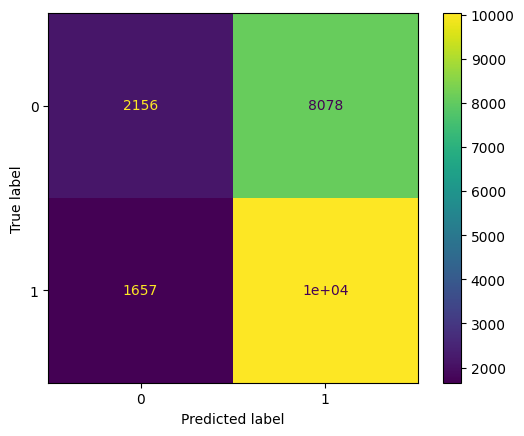

In [60]:
# logistic regression confusion matrix
labels = ["0", "1"]
cm = confusion_matrix(Y_test, lg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
print(classification_report(Y_test, lg_pred))

In [68]:
# late fusion
#create a dictionary of our models
estimators=[('rf', rf), ('tree', tree), ('log_reg', log_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_train, Y_train)
lf_pred = ensemble.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [66]:
print("Late Fusion Accuracy:",metrics.accuracy_score(Y_test, lf_pred))
lf_cv = cross_val_score(ensemble, X, Y, cv = 10, scoring='f1')
print("Mean CV F1 Score:", np.mean(lf_cv))
print("Standard Deviation F1 Score:", np.std(lf_cv))

Late Fusion Accuracy: 0.582987457240593


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Mean CV F1 Score: 0.6850240597848258
Standard Deviation F1 Score: 0.006698057292262924


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.62      0.28      0.38     10234
           1       0.57      0.85      0.68     11691

    accuracy                           0.58     21925
   macro avg       0.60      0.56      0.53     21925
weighted avg       0.59      0.58      0.54     21925



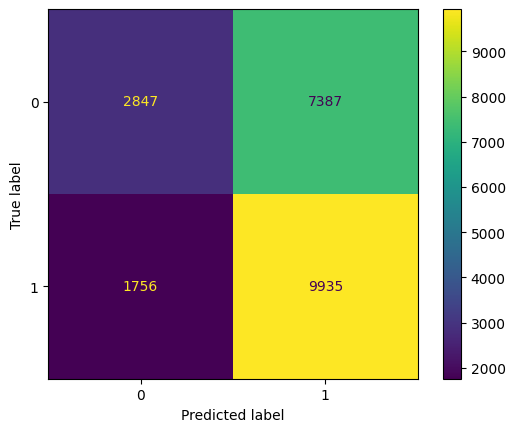

In [67]:
labels = ["0", "1"]
cm = confusion_matrix(Y_test, lf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
print(classification_report(Y_test, lf_pred))

## Adaboost Code

In [ ]:
# helper functions for Adaboost
def get_error_rate(pred, actual):
    return sum(pred != actual) / float(len(actual))

def print_error_rate(err):
    print('Error rate: %.4f' %error)
    
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of classifiers', fontsize = 12)
    plot1.set_xticklabels(['', '1', '', '2', '', '3', '', '4'])
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of classifiers', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')
    
def generic_clf(X_train, Y_train, X_test, Y_test, clf):
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), get_error_rate(pred_test, Y_test)

In [ ]:
# implement Adaboost
# fixed to use multiple classifiers, classifier-spec. features not included for now -ellen
# source: https://github.com/jaimeps/adaboost-implementation/blob/master/adaboost.py

def adaboost(X_train, Y_train, X_test, Y_test, N, classifiers, cfeatures):
    len_train, len_test = len(X_train), len(X_test)
    
    # initialize weights of training samples
    weights = np.ones(len_train) / len_train # eg. 11 samples, weight = 1/11
    pred_train, pred_test = np.zeros(len_train), np.zeros(len_test)
    
    for i in range(N): # N training subsets
        # fit classifier with the most updated weights
        classifiers[i].fit(X_train, Y_train, sample_weight = weights)
        pred_train_i = classifiers[i].predict(X_train)
        pred_test_i = classifiers[i].predict(X_test)
        
        # indicate whether predicted value matches with ground truth
        ind = [int(x) for x in (pred_train_i != Y_train)]
        ind_sign = [x if x==1 else -1 for x in ind] # determines e^-acc or e^acc
        pred_train_i = [x if x==1 else -1 for x in pred_train_i]
        pred_test_i = [x if x==1 else -1 for x in pred_train_i]
        
        # calculate error
        err = np.dot(weights, ind) / sum(weights) # numerator is sum of (weights.result)
        # calculate accuracy
        acc = 0.5 * np.log((1 - err) / float(err))
        
        # update weights
        weights = np.multiply(weights, np.exp([float(x) * acc for x in ind_sign]))
        # add to predictions
        pred_train = [sum(x) for x in zip(pred_train,
                                          [x * acc for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test,
                                         [x * acc for x in pred_test_i])]

    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    pred_train = [x if x==1 else 0 for x in pred_train]
    pred_test = [x if x==1 else 0 for x in pred_test]
    
    return get_error_rate(pred_train, Y_train), get_error_rate(pred_test, Y_test), pred_test


In [ ]:
# declare classifiers
gnb = GaussianNB()
#gnb_features = ['vote', 'verified', 'rev_Sentiment', 'rev_posSentiment', 'rev_negSentiment', 'summ_negSentiment', 'image', 'rev_posNegRatio', 'normalized_time', 'max_upvote', 'norm_time_diff']
tree = DecisionTreeClassifier(criterion='entropy', max_depth = 3)
#tree_features = ['verified', 'rev_negSentiment', 'summ_negSentiment', 'total_reviews', 'norm_time_diff']
rf = RandomForestClassifier(n_estimators = 28, max_depth = 1, n_jobs=-1)
#rf_features = features
lr = LogisticRegression()
#lr_features = features

classifiers = [gnb, tree, rf, lr]
#cfeatures = [gnb_features, tree_features, rf_features, lr_features]
cfeatures = []

x_range = range(1,5)
er_tree = generic_clf(X_train, Y_train, X_test, Y_test, tree)
#er_train, er_test = [er_tree[0]], [er_tree[1]]
er_train, er_test, ab_pred = [], [], []

# run Adaboost using gnb, decision tree, rand forest, logistic regression
# test with different # of iterations
for i in x_range:
    er_i = adaboost(X_train, Y_train, X_test, Y_test, i, classifiers, cfeatures)
    er_train.append(er_i[0])
    er_test.append(er_i[1])
    ab_pred.append(er_i[2])

plot_error_rate(er_train, er_test)